In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call
import sys
sys.path.append('../')
from package_global_functions import *

# extSSDpath = getExternalSSDpath()
# if os.path.exists(extSSDpath):
#     path = extSSDpath + getProjectFoldername() + '/evo_to_stationary/time_evos_dif_cond'
# else:
#     path = '/time_evos_dif_cond'

# EULER INTEGRATION FUNCTIONS:    
def fs_evo_eq(fs,pi1,pi2,q1,q2,l):
    df1dt = fs[0]*((1-l)*pi1+l*fs[1]) - fs[1]/q1
    df2dt = fs[0]*((1-l)*pi2+l*fs[2]) - fs[2]/q2
    return df1dt, df2dt

def intEvoSimple(pi1, pi2, q1, q2, l, ic, maxTime):
    """
    ic must be list; e.g. [0.1, 0.4, 0.5]
    """
    fs = ic
    fs_evo = [[ic[0]], [ic[1]], [ic[2]]]
    dt = 1
    for i in range(maxTime):
        df1dt, df2dt = fs_evo_eq(fs, pi1, pi2, q1, q2, l)
        dfsdt = np.array([-df1dt-df2dt, df1dt, df2dt])
        fs += dfsdt*dt
        fs_evo[0].append(fs[0]), fs_evo[1].append(fs[1]), fs_evo[2].append(fs[2])
    df = pd.DataFrame({'iter':list(range(maxTime+1)), 'f0':fs_evo[0], 'f1':fs_evo[1], 'f2':fs_evo[2]})
    return df

### Testing different ic sym q sym pi

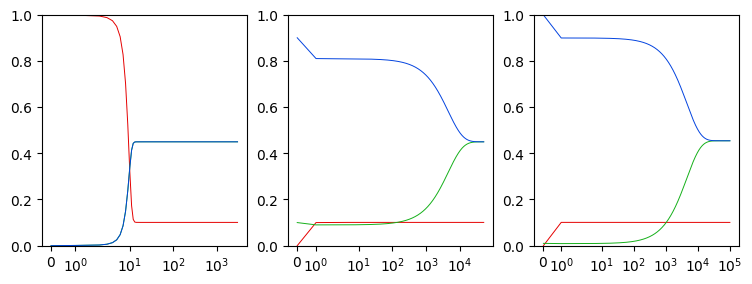

In [30]:
pi1, pi2, q1, q2, l = 0.1, 0.1, 10, 10, 0.99
call(f'../det_sols_from_polynomial/f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l}', shell=True)

df = intEvoSimple(pi1, pi2, q1, q2, l, [1.0, 0.0, 0.0], 3000)
df_ic1 = intEvoSimple(pi1, pi2, q1, q2, l, [0.0, 0.1, 0.9], 50000)
df_ic2 = intEvoSimple(pi1, pi2, q1, q2, l, [0.0, 0.01, 0.999], 100000)

fig, ax = plt.subplots(1,3, figsize=(9,3))
ax[0].set(xscale='symlog', ylim=(0,1))
ax[1].set(xscale='symlog', ylim=(0,1))
ax[2].set(xscale='symlog', ylim=(0,1))

ax[0].plot(df['iter'], df['f0'], color='xkcd:red', lw=0.7)
ax[0].plot(df['iter'], df['f1'], color='xkcd:green', lw=0.7)
ax[0].plot(df['iter'], df['f2'], color='xkcd:blue', lw=0.7)

ax[1].plot(df_ic1['iter'], df_ic1['f0'], color='xkcd:red', lw=0.7)
ax[1].plot(df_ic1['iter'], df_ic1['f1'], color='xkcd:green', lw=0.7)
ax[1].plot(df_ic1['iter'], df_ic1['f2'], color='xkcd:blue', lw=0.7)

ax[2].plot(df_ic2['iter'], df_ic2['f0'], color='xkcd:red', lw=0.7)
ax[2].plot(df_ic2['iter'], df_ic2['f1'], color='xkcd:green', lw=0.7)
ax[2].plot(df_ic2['iter'], df_ic2['f2'], color='xkcd:blue', lw=0.7)

### Testing different ic sym q asym p

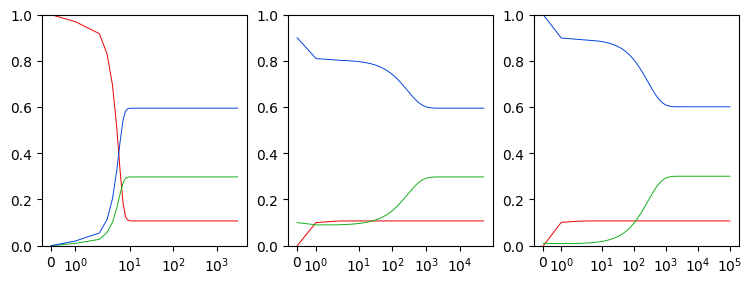

In [31]:
df = intEvoSimple(0.1, 0.2, 10, 10, 0.9, [1.0, 0.0, 0.0], 3000)
df_ic1 = intEvoSimple(0.1, 0.2, 10, 10, 0.9, [0.0, 0.1, 0.9], 50000)
df_ic2 = intEvoSimple(0.1, 0.2, 10, 10, 0.9, [0.0, 0.01, 0.999], 100000)

fig, ax = plt.subplots(1,3, figsize=(9,3))
ax[0].set(xscale='symlog', ylim=(0,1))
ax[1].set(xscale='symlog', ylim=(0,1))
ax[2].set(xscale='symlog', ylim=(0,1))

ax[0].plot(df['iter'], df['f0'], color='xkcd:red', lw=0.7)
ax[0].plot(df['iter'], df['f1'], color='xkcd:green', lw=0.7)
ax[0].plot(df['iter'], df['f2'], color='xkcd:blue', lw=0.7)

ax[1].plot(df_ic1['iter'], df_ic1['f0'], color='xkcd:red', lw=0.7)
ax[1].plot(df_ic1['iter'], df_ic1['f1'], color='xkcd:green', lw=0.7)
ax[1].plot(df_ic1['iter'], df_ic1['f2'], color='xkcd:blue', lw=0.7)

ax[2].plot(df_ic2['iter'], df_ic2['f0'], color='xkcd:red', lw=0.7)
ax[2].plot(df_ic2['iter'], df_ic2['f1'], color='xkcd:green', lw=0.7)
ax[2].plot(df_ic2['iter'], df_ic2['f2'], color='xkcd:blue', lw=0.7)